In [69]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [70]:
dt = pd.read_csv("U4_01_housing.csv")
dt.info()
dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [71]:
dt["ocean_proximity"].value_counts() # Con esta funcion crea un conteo de los datos segun como de repiten y los organiza mayor a menor

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [72]:
dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Con la funcion .hist nos sirve para crear un histograma con los datos obtenidos del dataframe y poder visualizarlo de forma mas sencilla

[[<Axes: title={'center': 'longitude'}>
  <Axes: title={'center': 'latitude'}>
  <Axes: title={'center': 'housing_median_age'}>]
 [<Axes: title={'center': 'total_rooms'}>
  <Axes: title={'center': 'total_bedrooms'}>
  <Axes: title={'center': 'population'}>]
 [<Axes: title={'center': 'households'}>
  <Axes: title={'center': 'median_income'}>
  <Axes: title={'center': 'median_house_value'}>]]


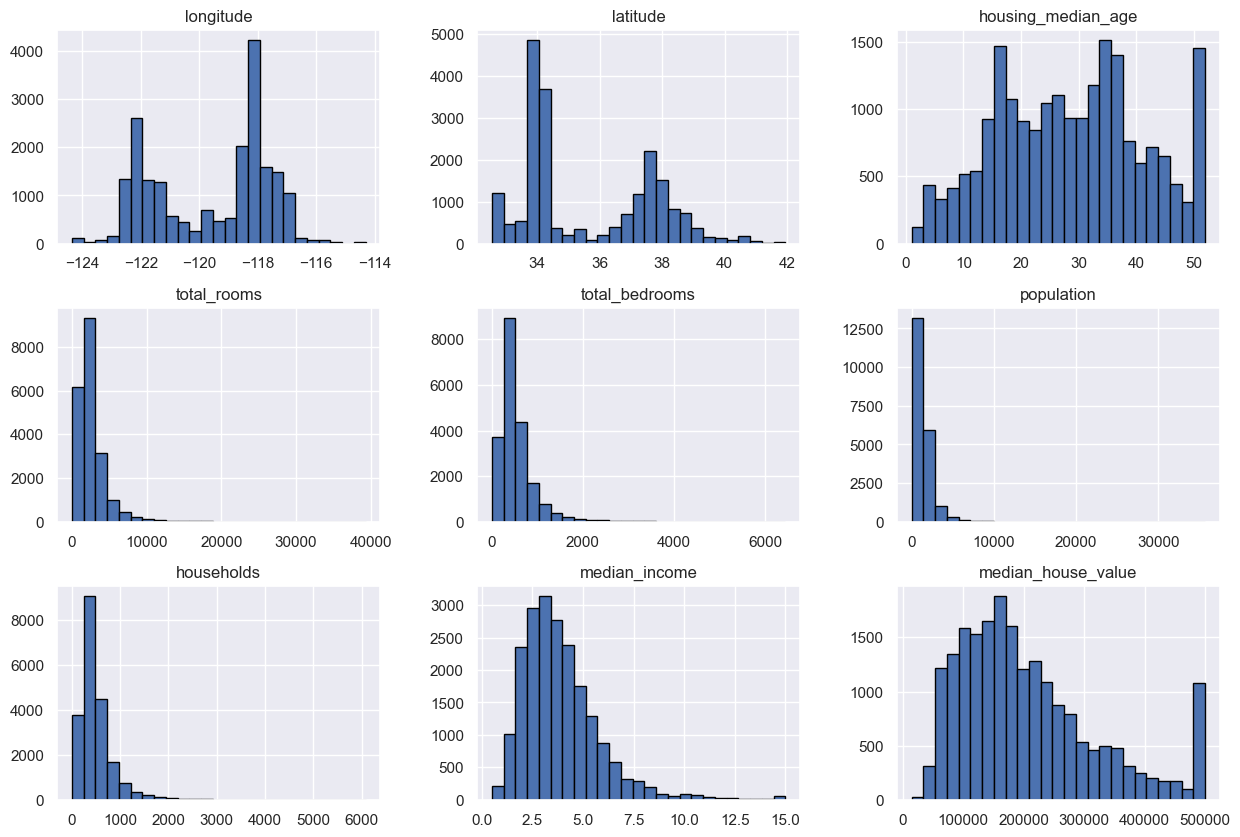

In [73]:
print(dt.hist(figsize = (15,10), # con el figsize se puede modificar los valores del tamaño donde el primer valor ingresado sera el ancho y el segundo el largo
               bins = 25, # ESta función indica cuantas columnas van a ser creadas para describir los datos creados a mas columnas mas grafico es el cambio del DataFrame(DF)
               edgecolor =  "black")) # El egdecolor simplemente es para cambiar el borde de las columnas

<Axes: xlabel='longitude', ylabel='latitude'>

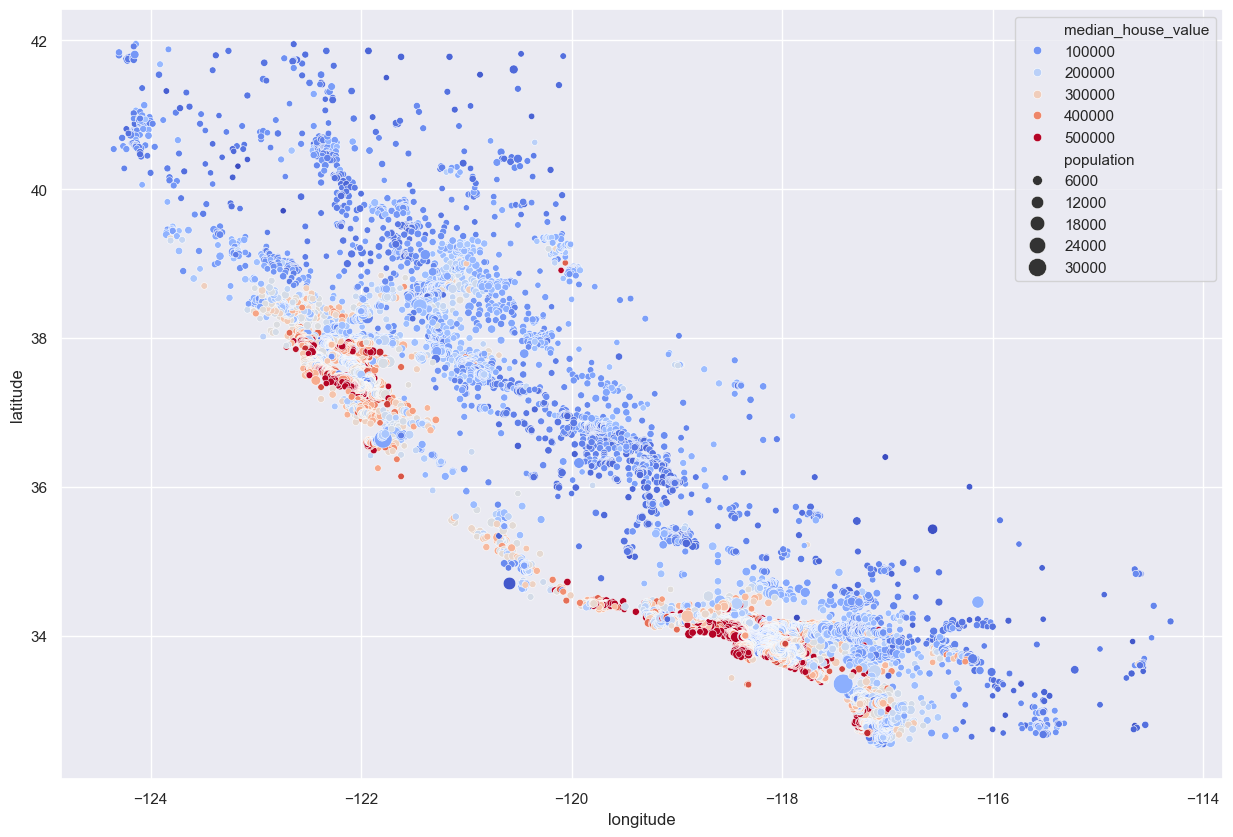

In [74]:
sb.scatterplot(x = "longitude", y = "latitude", data = dt, 
               hue = "median_house_value", palette = "coolwarm", 
               size = "population", sizes = (20,200)) # el sizes es para ajustar el tamaño en base a una medida en este caso a population, el sizes sirvee para modificar estos valores a nuestra conveniencia 

<Axes: xlabel='longitude', ylabel='latitude'>

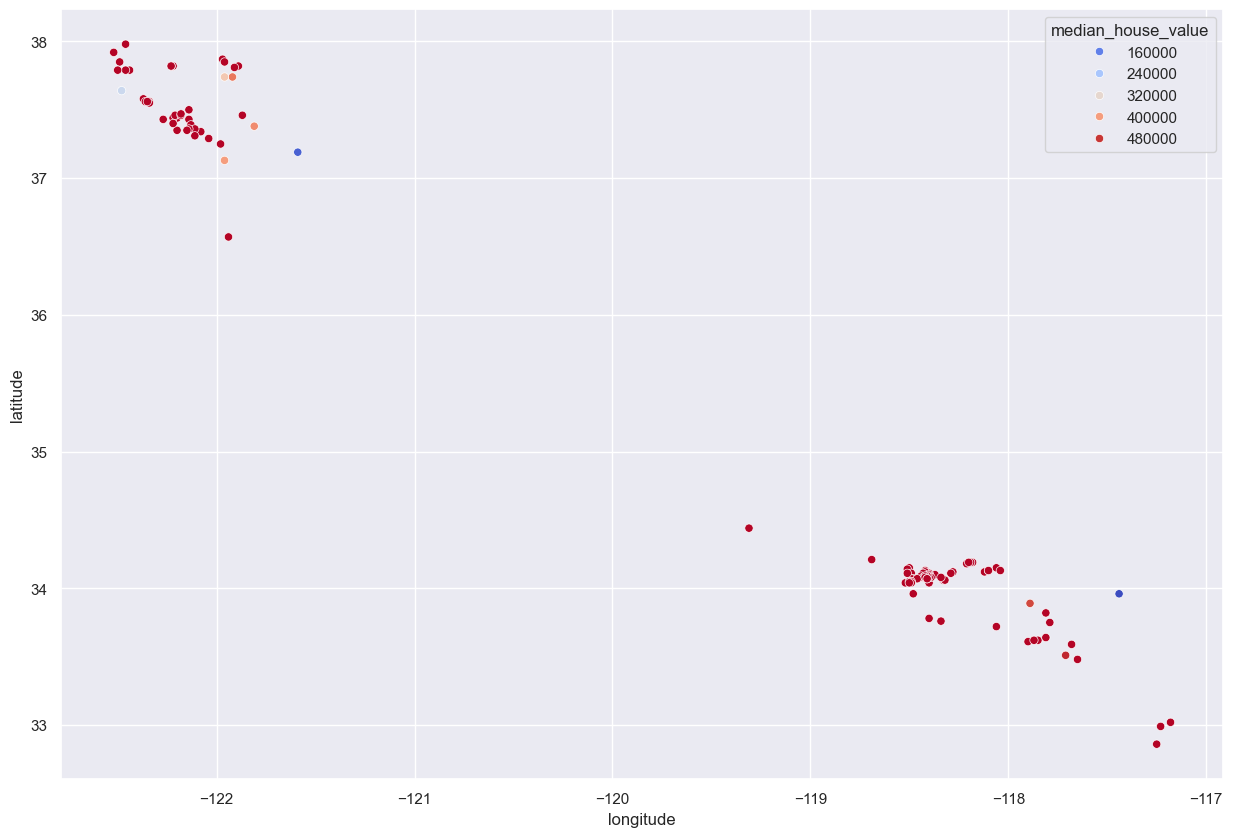

In [75]:
sb.scatterplot(x = "longitude", y = "latitude", data = dt[(dt.median_income > 12)], 
               hue = "median_house_value", palette = "coolwarm")

En estas dos lineas estamos viendo como nos hemos desecho de los valores que tiene al menos un valor vacio en la fila, esto para no generar error, aunque existen varias formas de lidiar con estos datos en caso de que no querramos eliminarlos, porque son pocos datos o son muy importante cada dato, en este caso como son muchisimos datos no existe ningun problema con eliminar un par

In [76]:
dt_na = dt.dropna()
dt_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Para poder hacer la relación de forma correcta necesitamos transformas todos los datos a un tipo númerico, pero podemos observar que hay un valor tipo object, para ello vamos a usar una función que nos sirve para convertir esta información en valores de 0 y 1, 0 en caso de que la casa no entre en este tipo de proximidad al oceano y 1 en caso se si lo haga

In [77]:
dummies = pd.get_dummies(dt_na["ocean_proximity"], dtype = int) 
# para ello se usa las funcion get_dummies para obtener las columnas de los datos ya separados
dummies.head(10) 

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


Con esta linea de codigo estamos uniendo lso dummies hacia el DF con los archivos sin valores vacios 

In [78]:
dt_na = dt_na.join(dummies)


In [79]:
dt_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
 10  <1H OCEAN           20433 non-null  int64  
 11  INLAND              20433 non-null  int64  
 12  ISLAND              20433 non-null  int64  
 13  NEAR BAY            20433 non-null  int64  
 14  NEAR OCEAN          20433 non-null  int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 2.5+ MB


In [80]:
dt_na = dt_na.drop(["ocean_proximity"], axis = 1)

Ahroa vamos a crear un heatmap que nos muestra la correlación de los datos según como varien otros datos, donde 1 signfica que estan directamente proporcionales y -1 significa que sin inversamente proporsionales

<Axes: >

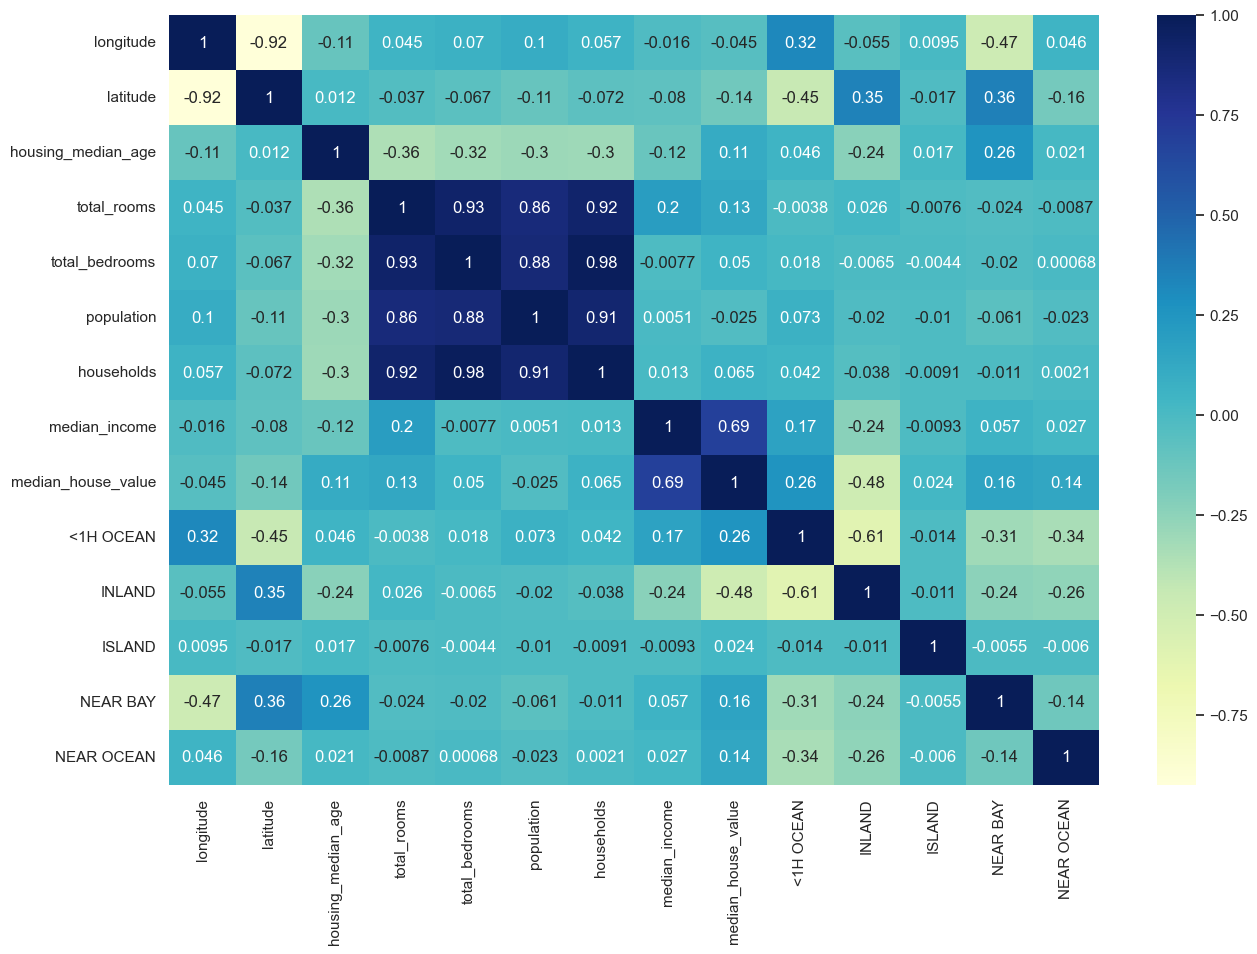

In [81]:
sb.set(rc={"figure.figsize":(15,10)}) # ESta linea nos sirve para poder ir modificiando el tamaño del grafico 
sb.heatmap(dt_na.corr(), annot = True , cmap= "YlGnBu" ) # para este heatmap le pasamos tres parametros, el primero seria el DF del cual se ava a guiar
# El segundo se refiere si desea ver los numeros de la relación dentro del heatmap y el tercero, nos cambia los colores en este caso a Yellow, Green, Blue

In [82]:
dt_na.corr()["median_house_value"].sort_values(ascending = False) # De esta forma nada mostramos los valores que afectan a la median house value, y ademas demostrarlo que sea de mayor a menor 

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

En este grafico se observa como son la relación de los datos respecto de el valor de la casa con respecto de los ingresos de las personas, y esto nos deja la idea de que en realidad hay muchos valores que se acumulan al final esto debido a que es el limite de nuestra medida del valor de las casas lo que a futuro no deja un problema

<Axes: xlabel='median_house_value', ylabel='median_income'>

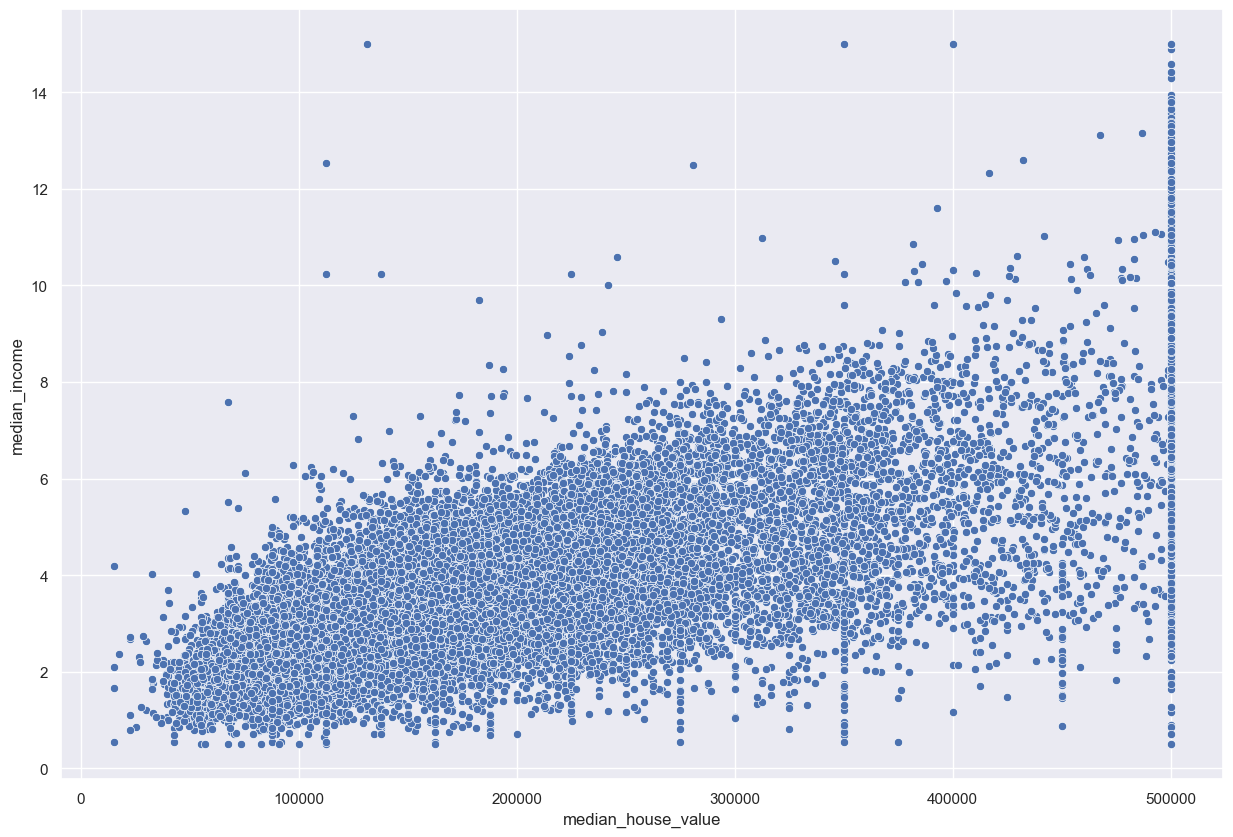

In [83]:
sb.scatterplot(x = "median_house_value", y = "median_income" , data = dt_na)

Como estos datos que estamso usando no son muy precisos en el limite de datos debido que los datos que sean mayores o iguales al maximo dato, entonces genera que los datos no sean os mejores para entrenar el modelo y por ende es mejor eliminarlo 

In [84]:
dt_na = dt_na[dt_na["median_house_value"] < 500000] # En estas dos lineas de codigo estamos tomando una booleanda con la comparacion y si da un
dt_na = dt_na[dt_na["housing_median_age"] < 52] # True entonces se toma el dato y por ende se separa el dato que no queremos

[[<Axes: title={'center': 'longitude'}>
  <Axes: title={'center': 'latitude'}>
  <Axes: title={'center': 'housing_median_age'}>
  <Axes: title={'center': 'total_rooms'}>]
 [<Axes: title={'center': 'total_bedrooms'}>
  <Axes: title={'center': 'population'}>
  <Axes: title={'center': 'households'}>
  <Axes: title={'center': 'median_income'}>]
 [<Axes: title={'center': 'median_house_value'}>
  <Axes: title={'center': '<1H OCEAN'}>
  <Axes: title={'center': 'INLAND'}> <Axes: title={'center': 'ISLAND'}>]
 [<Axes: title={'center': 'NEAR BAY'}>
  <Axes: title={'center': 'NEAR OCEAN'}> <Axes: > <Axes: >]]


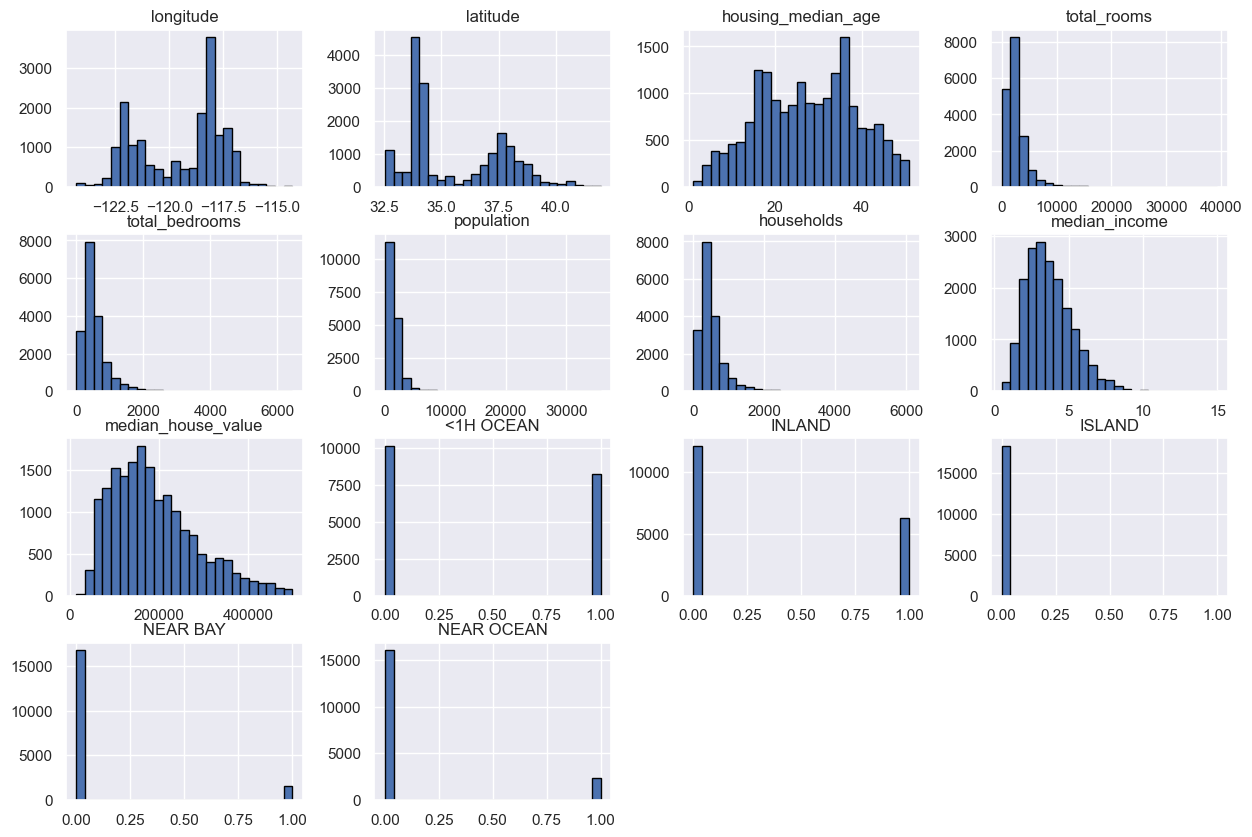

In [85]:
print(dt_na.hist(figsize = (15,10), # con el figsize se puede modificar los valores del tamaño donde el primer valor ingresado sera el ancho y el segundo el largo
               bins = 25, # ESta función indica cuantas columnas van a ser creadas para describir los datos creados a mas columnas mas grafico es el cambio del DataFrame(DF)
               edgecolor =  "black")) # El egdecolor simplemente es para cambiar el borde de las columnas

<Axes: >

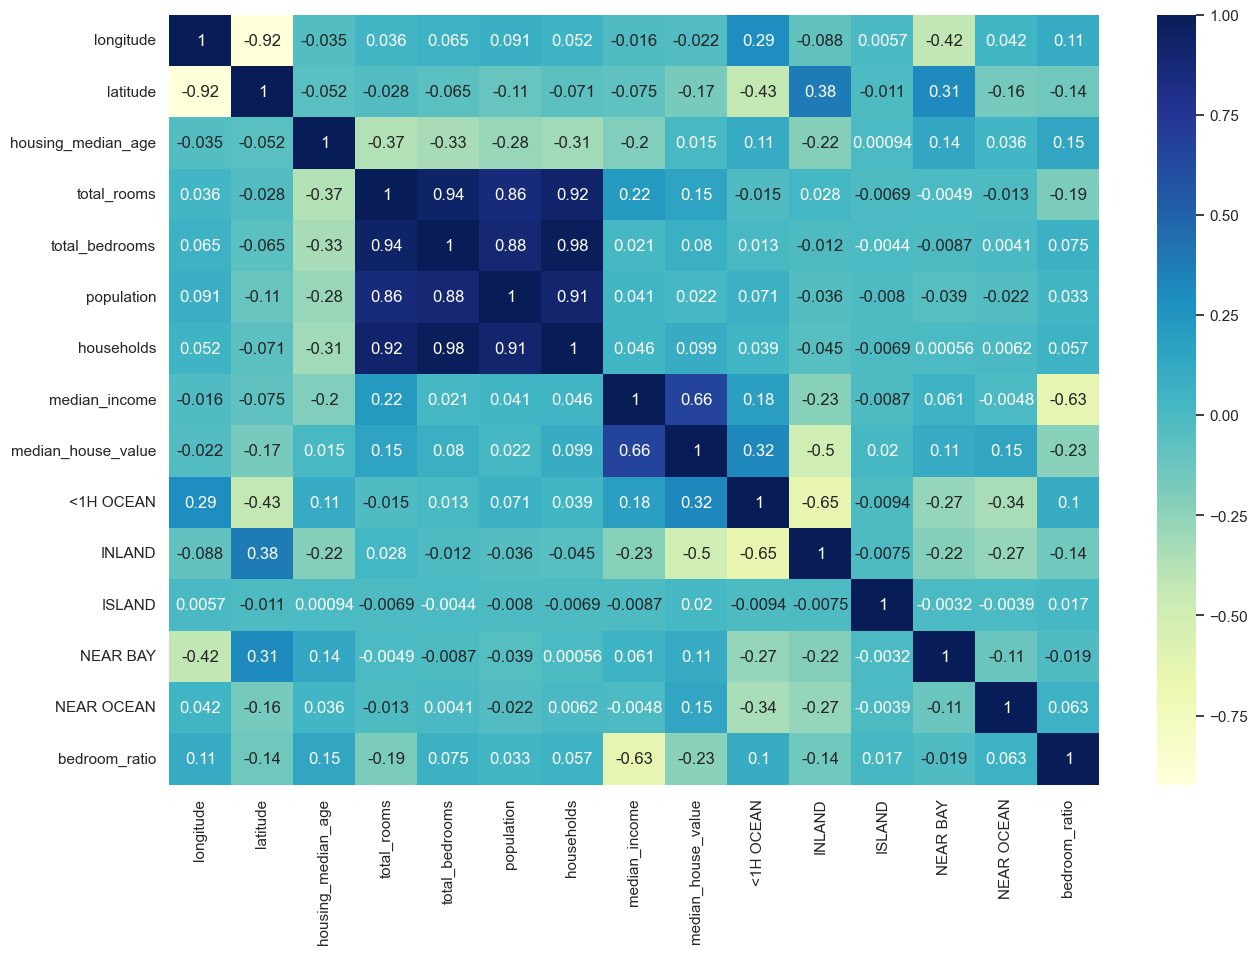

In [86]:
dt_na["bedroom_ratio"] = dt_na["total_bedrooms"] / dt_na["total_rooms"]
sb.set(rc={"figure.figsize":(15,10)}) 
sb.heatmap(dt_na.corr(), annot = True , cmap= "YlGnBu" )

Vamos a seprar las caracterisiticas de la etiqueta, que la etiqueta sería median_house_value y las caracteriticas seria el resto de datos que hacen que varie esta etiqueta

In [87]:
X = dt_na.drop(["median_house_value"], axis = 1)
y = dt_na["median_house_value"]

Vamos a separrar los datos en dos conjuntos: el primeor sera con el fin de entrenar al modelo y el segundo con el fin de hacerle pruebas, en este caso a mitad de los datos lo tomamos de entrenamiento y la otra mitad de prueb, y como se puede observar esto nos retorna catro variables, que son las dos diviiones de las caracterisiticas y las etiquetas

In [88]:
X_entre, X_prue, y_entre, y_prue = train_test_split(X,y,test_size= 0.5)

In [89]:
modelo = LinearRegression()
modelo.fit(X_entre, y_entre)

LinearRegression()

In [90]:
prediction = modelo.predict(X_prue)
predict = {"pedriccion": prediction, "Valor real": y_prue}

pd.DataFrame(predict)

,pedriccion,Valor real
8335,162235.275733,175000.0
11293,251146.350294,193400.0
2894,82709.272447,58100.0
2372,81430.220736,63900.0
17572,243218.360695,192600.0
...,...,...
8128,219558.218974,199100.0
774,193262.129292,174100.0
7536,170997.121909,100000.0
16852,233625.551916,292900.0


Esta puntuación del modelo nos muestra como este tanto en el comportamiento de la prueba como el del entrenamieto es similiar el resultado, lo que en parte es bueno porque significa que nuestro modelo tiene una buena eficiiencia ante datos que no ha visto, ante unos que ya reviso

In [91]:
print(modelo.score(X_entre, y_entre))
print(modelo.score(X_prue, y_prue))

0.6383093898569627
0.6285992521576746


In [92]:
mse = mean_squared_error(y_prue,prediction)
print(f"Esta es la potencia promedio de la diferecnia de losd atos en comparacion al original {mse}")
mse = np.sqrt(mse)
print(f"Este es el promedio de la diferecnia de losd atos en comparacion al original {mse}")

Esta es la potencia promedio de la diferecnia de losd atos en comparacion al original 3377384859.314028
Este es el promedio de la diferecnia de losd atos en comparacion al original 58115.27216931904


Para mejorar la eficiencia de nuestor proyecto lo mejor seria es mejor escalar las medidas de nuestros datos en un rango que sea similiar la relación que existe entre los diferentes datos como que todos se encuentren en una escala entre -1 y 1 y haci mirar tendencias de una forma mas precisa y que nuestro modelo se entrened de mejor manera

In [93]:
scaler = StandardScaler()

X_entre_sca = scaler.fit_transform (X_entre)

X_prue_sca = scaler.fit_transform (X_prue)


Estos son los datos ya escalados para que todos los datos tengan la misma importancia y poder entonces entrenar al modelo de la mejor manera

In [94]:
X_entre_sca = pd.DataFrame(X_entre_sca)
print(X_entre_sca)

            0         1         2         3         4         5         6   \
0    -1.365123  1.163701  0.699616 -0.239228 -0.337408 -0.228827 -0.251237   
1     0.682679 -0.762958  0.438264 -0.664081 -0.400163  0.242900 -0.370795   
2    -0.290783  0.675055 -0.781382 -1.010058 -1.090466 -1.037976 -1.108494   
3     0.692767 -0.660575  1.396556 -0.463755 -0.418757 -0.373081 -0.452197   
4     0.803731 -0.795534  0.002676 -0.818695 -1.002145 -0.897038 -0.950779   
...        ...       ...       ...       ...       ...       ...       ...   
9176  0.874345 -0.893263 -0.955617 -0.443588 -0.474539 -0.817450 -0.434390   
9177 -0.911177  1.396389 -0.868499 -0.745645 -0.916147 -0.952585 -0.884641   
9178 -1.460956  0.996165  1.483674  1.878763  2.414508  1.495589  2.228957   
9179  0.768424 -0.809496  0.176911 -0.603131 -0.495457 -0.437747 -0.541229   
9180  1.141669 -1.121298 -0.171559 -0.459273 -0.302544 -0.348210 -0.307201   

            7         8         9    10        11        12    